In [23]:
import Calibration as cal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd

In [24]:
path = r"../data"
sensor_type = "Calibration"

## Run calibration with NIR compensation

Found matching files:
Calibration.2025.sensor1.csv
Max R2 is reached with 8 PLS components
max R2: 0.8527, min RMSE: 0.19109149
Coefficients (comma-separated): 8.166965234342522, 4.511993292458017, 3.0205491819609454, 2.314961693324389, 1.9885528552855285, 1.5199232131028755, 1.3249591904257805, 0.9821819710872466, -1.2272751151650514, 0.05726402866556833
Found matching files:
Calibration.2025.sensor2.csv
Max R2 is reached with 6 PLS components
max R2: 0.8139, min RMSE: 0.21477707
Coefficients (comma-separated): 10.486297752069278, 5.622367286749721, 4.188057194275077, 3.524771648971461, 2.8653300062304043, 2.201200265972613, 2.409960778713206, 1.5376897323511363, -1.2673103194941797, 0.07090202271230031
Found matching files:
Calibration.2025.sensor3.csv
Max R2 is reached with 6 PLS components
max R2: 0.9236, min RMSE: 0.13758979
Coefficients (comma-separated): 10.715572933246204, 5.651043526690871, 4.249558142321445, 3.4518386798873024, 2.8649751063952364, 2.4021706808287333, 2.403603

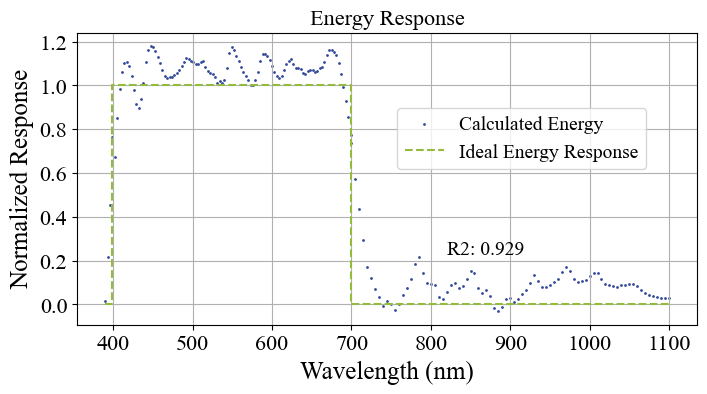

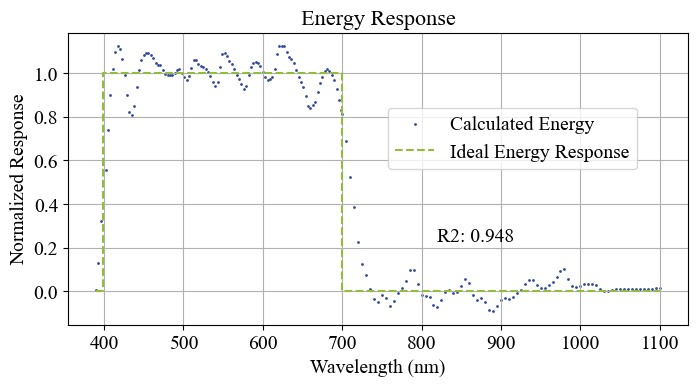

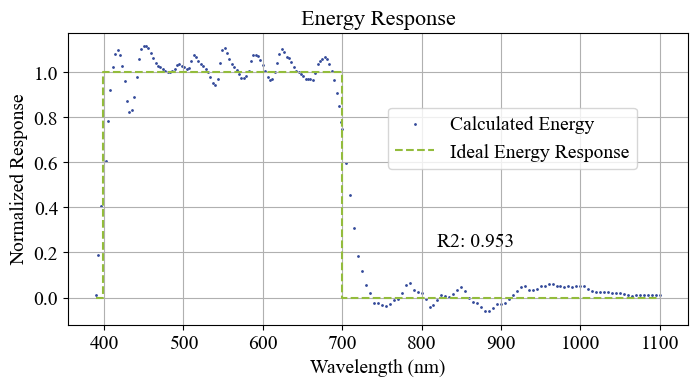

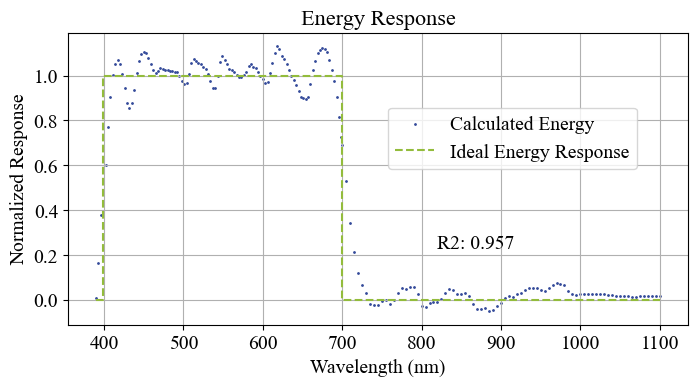

In [25]:
channels = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'clear', 'nir']
nir_comp_all = []
stats_all = []

# Collect nir_comp for each iteration
for sensor_nr in range(1, 5):
    sensor_instance = cal.Calibration(path, sensor_nr, sensor_type)
    if sensor_instance.preprocessing(save_data=False, spectrum = 'PAR', PAR=False):
        sensor_instance.regression(reg = "pls",save_coef=False, channels=channels, PAR=False)#.pls(channels=channels)
        #_, nir_comp, _ = sensor_instance.plot_quantum_response(plot=False)
        _, nir_comp, _ = sensor_instance.plot_energy_response(plot=True)
        nir_comp_all.append(nir_comp)
        stats_all.append(sensor_instance._repeatability())
        #sensor_instance.plot_gaussian(save=True)

## Run calibration only with visible channels f1 to f8

In [26]:
channels = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
wl_all = []
vis_all = []
PAR_all= []

for sensor_nr in range(1, 5):
    sensor_instance = cal.Calibration(path, sensor_nr, sensor_type)
    if sensor_instance.preprocessing(save_data=False, spectrum = 'PAR', PAR=False):
        sensor_instance.regression(reg = "pls",save_coef=False, channels=channels, PAR=False)#.pls(channels=channels, save_coef=False)
        #wl, vis, PAR = sensor_instance.plot_quantum_response(plot = False)
        wl, vis, PAR = sensor_instance.plot_energy_response(plot = False)
        wl_all.append(wl)
        vis_all.append(vis)
        PAR_all.append(PAR)

Found matching files:
Calibration.2025.sensor1.csv
Max R2 is reached with 2 PLS components
max R2: -1.1345, min RMSE: 0.72740124
Coefficients (comma-separated): 7.648420674739942, 4.446245066236529, 3.0945670496113786, 2.148440841834538, 1.7814236634658933, 1.1977528856325554, 1.1502682436487777, 0.7007478073169515
Found matching files:
Calibration.2025.sensor2.csv
Max R2 is reached with 2 PLS components
max R2: -0.2175, min RMSE: 0.54936767
Coefficients (comma-separated): 10.469594587640731, 5.6600428064888275, 4.289456529057258, 3.3131734598724405, 2.6149601005869823, 1.8984500480866586, 2.1376934366450033, 1.1713303961371122
Found matching files:
Calibration.2025.sensor3.csv
Max R2 is reached with 1 PLS components
max R2: 0.0047, min RMSE: 0.49670943
Coefficients (comma-separated): 6.210313164834461, 4.099333078580246, 3.8242177473374652, 2.9822390118074447, 2.66311838499856, 2.363696418667168, 2.3028865036484842, 1.1490282248584953
Found matching files:
Calibration.2025.sensor4.csv

## Compare calibrations

R2 VIS: 0.767
R2 NIR: 0.953


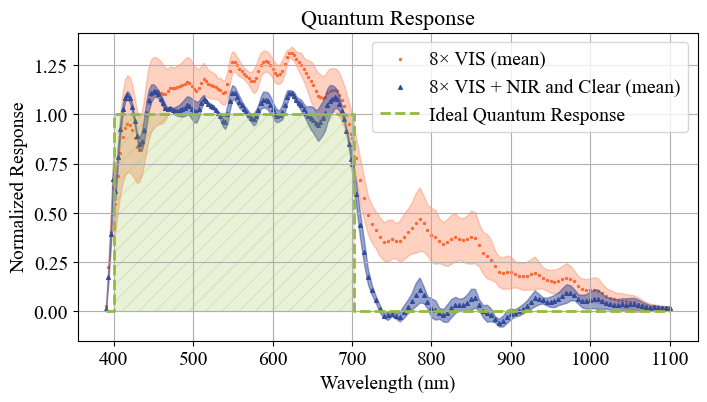

In [27]:
plt.figure(figsize=[8,4])

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

mean_vis = np.mean(vis_all, axis=0)
std_vis = np.std(vis_all, axis=0)
coef_of_variation_vis = std_vis / mean_vis * 100
#print(f"Coefficient of Variation VIS: {coef_of_variation_vis.mean():.3f}")
#print(f"Mean VIS: {mean_vis.mean():.3f}")
#print(f"Std VIS: {std_vis.mean():.3f}")

mean_nir_comp = np.mean(nir_comp_all, axis=0)
std_nir_comp = np.std(nir_comp_all, axis=0)
coef_of_variation_nir_comp = std_nir_comp / mean_nir_comp * 100
#print(f"Coefficient of Variation NIR Comp: {coef_of_variation_nir_comp.mean():.3f}")
#print(f"Mean NIR Comp: {mean_nir_comp.mean():.3f}")
#print(f"Std NIR Comp: {std_nir_comp.mean():.3f}")

# Filter data to only include wavelengths up to 900nm
wl_filtered = wl[wl <= 1100]
mean_vis = mean_vis[:len(wl_filtered)]
std_vis = std_vis[:len(wl_filtered)]
mean_nir_comp = mean_nir_comp[:len(wl_filtered)]
std_nir_comp = std_nir_comp[:len(wl_filtered)]
PAR_filtered = PAR[:len(wl_filtered)]


#plt.scatter(wl, vis, label='VIS channels', color='#ff6733', marker='o', s=1)

plt.scatter(wl_filtered, mean_vis, label='8× VIS (mean)', color='#ff6733', marker='o', s=2)
plt.fill_between(wl_filtered, mean_vis - std_vis, mean_vis + std_vis, color='#ff6733', alpha=0.3)

plt.scatter(wl_filtered, mean_nir_comp, label='8× VIS + NIR and Clear (mean)', color='#344a9a', marker='^', s=7)
plt.fill_between(wl_filtered, mean_nir_comp - std_nir_comp, mean_nir_comp + std_nir_comp, color='#344a9a', alpha=0.5)

#plt.scatter(wl, nir_comp, label='NIR compensated', color='#344a9a', s=3, marker='o')
plt.step(wl_filtered, PAR_filtered, linestyle='--', label=f'Ideal Quantum Response', color="#93bc3c", linewidth=2, where='mid')
plt.fill_between(wl_filtered, 0, PAR_filtered , color="#93bc3c", alpha=0.2, hatch='//', edgecolor='#93bc3c', step='mid')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

print(f"R2 VIS: {r2_score(PAR_filtered, mean_vis):.3f}")
print(f"R2 NIR: {r2_score(PAR_filtered, mean_nir_comp):.3f}")

plt.grid()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Response')
#plt.text(820, 0.23, f"R2: {r2_score(PAR, nir_comp):.3f}", fontsize = 14)
# Remove rows with NaN values in 'PAR' or 'PAR_calculated'
plt.title(f'Quantum Response')
#plt.title(f'{self.sensor_type} Sensor {self.sensor_number} Quantum Response')
plt.legend(loc = "upper right", bbox_to_anchor=(1,1), fontsize = 14, handletextpad=0.5)
#plt.savefig(f'quantum_response.png', dpi=600, bbox_inches='tight')


R2 VIS: 0.583
R2 NIR: 0.894


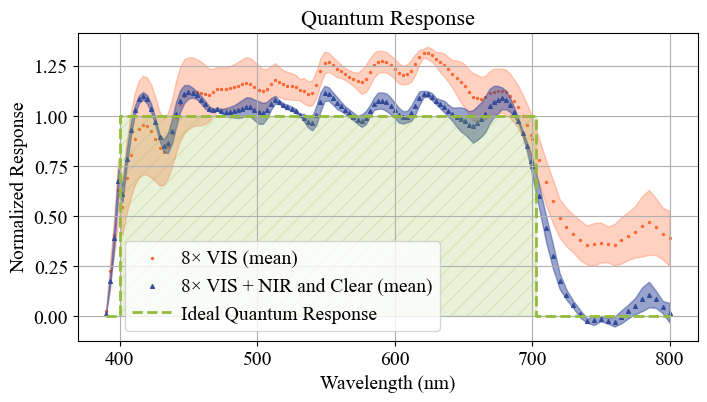

In [28]:
plt.figure(figsize=[8,4])

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

mean_vis = np.mean(vis_all, axis=0)
std_vis = np.std(vis_all, axis=0)
coef_of_variation_vis = std_vis / mean_vis * 100
#print(f"Coefficient of Variation VIS: {coef_of_variation_vis.mean():.3f}")
#print(f"Mean VIS: {mean_vis.mean():.3f}")
#print(f"Std VIS: {std_vis.mean():.3f}")

mean_nir_comp = np.mean(nir_comp_all, axis=0)
std_nir_comp = np.std(nir_comp_all, axis=0)
coef_of_variation_nir_comp = std_nir_comp / mean_nir_comp * 100
#print(f"Coefficient of Variation NIR Comp: {coef_of_variation_nir_comp.mean():.3f}")
#print(f"Mean NIR Comp: {mean_nir_comp.mean():.3f}")
#print(f"Std NIR Comp: {std_nir_comp.mean():.3f}")

# Filter data to only include wavelengths up to 900nm
wl_filtered = wl[wl <= 800]
mean_vis = mean_vis[:len(wl_filtered)]
std_vis = std_vis[:len(wl_filtered)]
mean_nir_comp = mean_nir_comp[:len(wl_filtered)]
std_nir_comp = std_nir_comp[:len(wl_filtered)]
PAR_filtered = PAR[:len(wl_filtered)]


#plt.scatter(wl, vis, label='VIS channels', color='#ff6733', marker='o', s=1)

plt.scatter(wl_filtered, mean_vis, label='8× VIS (mean)', color='#ff6733', marker='o', s=2)
plt.fill_between(wl_filtered, mean_vis - std_vis, mean_vis + std_vis, color='#ff6733', alpha=0.3)

plt.scatter(wl_filtered, mean_nir_comp, label='8× VIS + NIR and Clear (mean)', color='#344a9a', marker='^', s=7)
plt.fill_between(wl_filtered, mean_nir_comp - std_nir_comp, mean_nir_comp + std_nir_comp, color='#344a9a', alpha=0.5)

#plt.scatter(wl, nir_comp, label='NIR compensated', color='#344a9a', s=3, marker='o')
plt.step(wl_filtered, PAR_filtered, linestyle='--', label=f'Ideal Quantum Response', color="#93bc3c", linewidth=2, where='mid')
plt.fill_between(wl_filtered, 0, PAR_filtered , color="#93bc3c", alpha=0.2, hatch='//', edgecolor='#93bc3c', step='mid')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

print(f"R2 VIS: {r2_score(PAR_filtered, mean_vis):.3f}")
print(f"R2 NIR: {r2_score(PAR_filtered, mean_nir_comp):.3f}")

plt.grid()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Response')
#plt.text(820, 0.23, f"R2: {r2_score(PAR, nir_comp):.3f}", fontsize = 14)
# Remove rows with NaN values in 'PAR' or 'PAR_calculated'
plt.title(f'Quantum Response')
#plt.title(f'{self.sensor_type} Sensor {self.sensor_number} Quantum Response')
plt.legend(loc = "lower left", bbox_to_anchor=(0.06,0.0), fontsize = 14, handletextpad=0.5)
#plt.savefig(f'quantum_response_short.png', dpi=600, bbox_inches='tight')


R2 NIR: 0.894


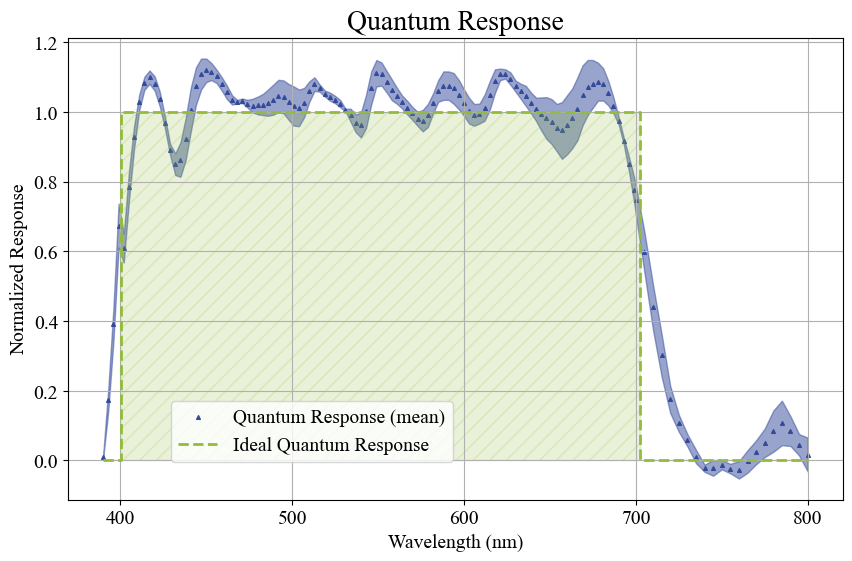

In [29]:
plt.figure(figsize=[10,6])

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"


plt.scatter(wl_filtered, mean_nir_comp, label='Quantum Response (mean)', color='#344a9a', marker='^', s=7)
plt.fill_between(wl_filtered, mean_nir_comp - std_nir_comp, mean_nir_comp + std_nir_comp, color='#344a9a', alpha=0.5)

#plt.scatter(wl, nir_comp, label='NIR compensated', color='#344a9a', s=3, marker='o')
plt.step(wl_filtered, PAR_filtered, linestyle='--', label=f'Ideal Quantum Response', color="#93bc3c", linewidth=2, where='mid')
plt.fill_between(wl_filtered, 0, PAR_filtered , color="#93bc3c", alpha=0.2, hatch='//', edgecolor='#93bc3c', step='mid')

plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20

print(f"R2 NIR: {r2_score(PAR_filtered, mean_nir_comp):.3f}")

plt.grid()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Response')
#plt.text(820, 0.23, f"R2: {r2_score(PAR, nir_comp):.3f}", fontsize = 14)
# Remove rows with NaN values in 'PAR' or 'PAR_calculated'
plt.title(f'Quantum Response')
#plt.title(f'{self.sensor_type} Sensor {self.sensor_number} Quantum Response')
plt.legend(loc = "lower left", bbox_to_anchor=(0.12,0.06), fontsize = 14)


R2 NIR: 0.894


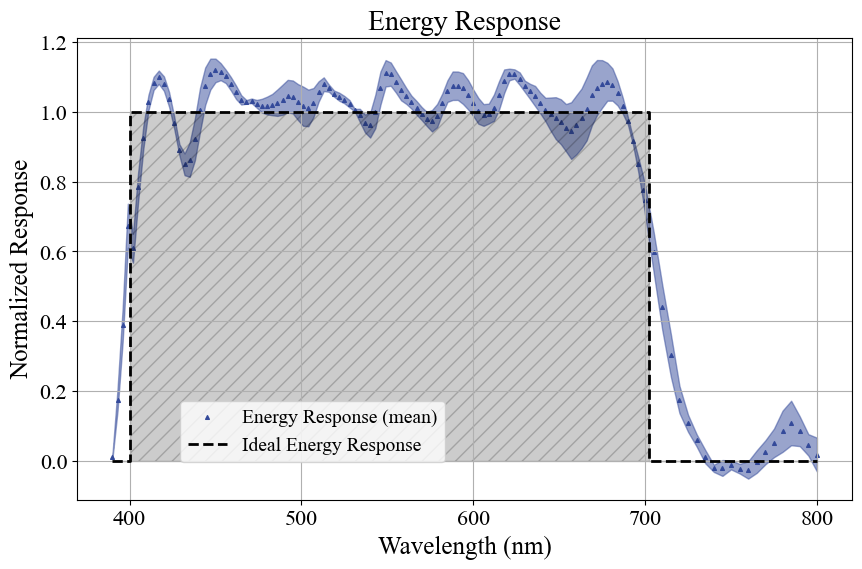

In [31]:
plt.figure(figsize=[10,6])

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"


plt.scatter(wl_filtered, mean_nir_comp, label='Energy Response (mean)', color='#344a9a', marker='^', s=7)
plt.fill_between(wl_filtered, mean_nir_comp - std_nir_comp, mean_nir_comp + std_nir_comp, color='#344a9a', alpha=0.5)

#plt.scatter(wl, nir_comp, label='NIR compensated', color='#344a9a', s=3, marker='o')
plt.step(wl_filtered, PAR_filtered, linestyle='--', label=f'Ideal Energy Response', color="black", linewidth=2, where='mid')
plt.fill_between(wl_filtered, 0, PAR_filtered , color="black", alpha=0.2, hatch='//', edgecolor="black", step='mid')

plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20

print(f"R2 NIR: {r2_score(PAR_filtered, mean_nir_comp):.3f}")

plt.grid()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Response')
#plt.text(820, 0.23, f"R2: {r2_score(PAR, nir_comp):.3f}", fontsize = 14)
# Remove rows with NaN values in 'PAR' or 'PAR_calculated'
plt.title(f'Energy Response')
#plt.title(f'{self.sensor_type} Sensor {self.sensor_number} Quantum Response')
plt.legend(loc = "lower left", bbox_to_anchor=(0.12,0.06), fontsize = 14)


R2 NIR: 0.894


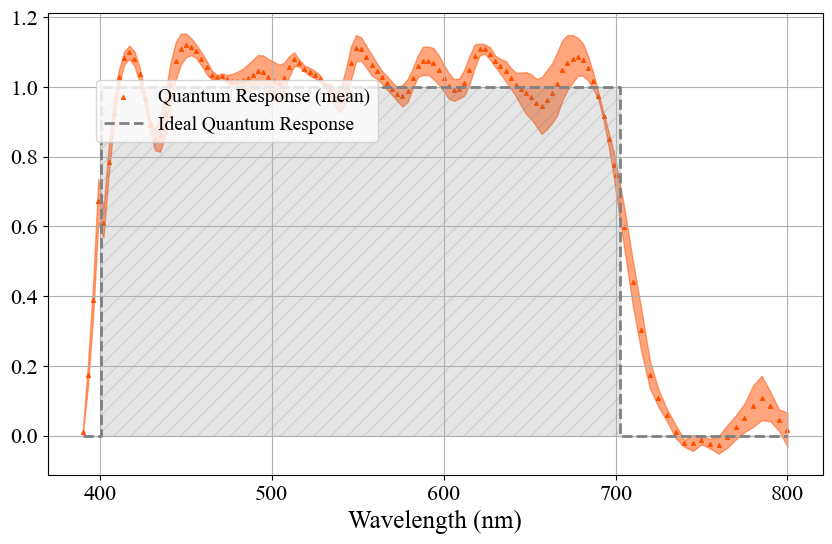

In [ ]:
plt.figure(figsize=[10,6])

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"


f2_colour = '#0028ff'       # λ = 445nm
f4_colour = '#1fff00'       # λ = 515nm
f4_colour_dark = '#17b200'  # λ = 515nm, 30% darker
f7_colour = '#ff4f00'       # λ = 630nm

plt.scatter(wl_filtered, mean_nir_comp, label='Quantum Response (mean)', color=f7_colour , marker='^', s=7)
plt.fill_between(wl_filtered, mean_nir_comp - std_nir_comp, mean_nir_comp + std_nir_comp, color=f7_colour, alpha=0.5)

#plt.scatter(wl, nir_comp, label='NIR compensated', color='#344a9a', s=3, marker='o')
plt.step(wl_filtered, PAR_filtered, linestyle='--', label=f'Ideal Quantum Response', color='#808080', linewidth=2, where='mid')
plt.fill_between(wl_filtered, 0, PAR_filtered , color='#808080', alpha=0.2, hatch='//', edgecolor='#808080', step='mid')

plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20

print(f"R2 NIR: {r2_score(PAR_filtered, mean_nir_comp):.3f}")

plt.grid()
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Normalized Response')
#plt.text(820, 0.23, f"R2: {r2_score(PAR, nir_comp):.3f}", fontsize = 14)
# Remove rows with NaN values in 'PAR' or 'PAR_calculated'
#plt.title(f'Quantum Response')
#plt.title(f'{self.sensor_type} Sensor {self.sensor_number} Quantum Response')
plt.legend(loc = "lower left", bbox_to_anchor=(0.05,0.7), fontsize = 14)


## Calculate the calibration uncertainty between the four sensors

In [ ]:
r2_all = []
for i, sensor in enumerate(nir_comp_all):
    r2 = r2_score(PAR, nir_comp_all[i])
    r2_all.append(r2)
    #print(f"r2: {i+1}: {r2:.3f}")
#print("-")
r2_all_vis = []
for i, sensor in enumerate(vis_all):
    r2 = r2_score(PAR, vis_all[i])
    r2_all_vis.append(r2)
    #print(f"r2 vis: {i+1}: {r2:.3f}")
#print("-")
print(f"R2 mean NIR compensation: {np.mean(r2_all)*100:.3f}")
print(f"R2 std NIR compensation: {np.std(r2_all)*100:.3f}")
print(f"relative uncertainty NIR compensation: {np.std(r2_all)/np.mean(r2_all)*100:.3f} %")
print("-")
print(f"R2 mean VIS: {np.mean(r2_all_vis)*100:.3f}")
print(f"R2 std VIS: {np.std(r2_all_vis)*100:.3f}")
print(f"relative uncertainty VIS: {np.std(r2_all_vis)/np.mean(r2_all_vis)*100:.3f} %")

R2 mean NIR compensation: 94.699
R2 std NIR compensation: 1.081
relative uncertainty NIR compensation: 1.141 %
-
R2 mean VIS: 72.297
R2 std VIS: 13.030
relative uncertainty VIS: 18.023 %


## Calculate relative uncertainty of repeatability and measurement uncertainty for each wavelength range.

In [ ]:
CV_means_390 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "390_399"]
    CV_means_390.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
uncertainty_390 = np.sqrt(5**2 + np.mean(CV_means_390)**2)

CV_means_400 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "400_439"]
    CV_means_400.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
uncertainty_400 = np.sqrt(5**2 + np.mean(CV_means_400)**2)

CV_means_440 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "440_700"]
    CV_means_440.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
uncertainty_440 = np.sqrt(3**2 + np.mean(CV_means_440)**2)

CV_means_701 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "701_1100"]
    CV_means_701.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
uncertainty_701 = np.sqrt(3**2 + np.mean(CV_means_701)**2)

In [ ]:
# Prepare rows
rows = [
    ("390_399", np.mean(CV_means_390), np.std(CV_means_390), uncertainty_390),
    ("400_439", np.mean(CV_means_400), np.std(CV_means_400), uncertainty_400),
    ("440_700", np.mean(CV_means_440), np.std(CV_means_440), uncertainty_440),
    ("701_1100", np.mean(CV_means_701), np.std(CV_means_701), uncertainty_701),
]

# Print header
print(f"{'Wavelength Range (nm)':<25} {'Repeatability (%)':<25} {'Measurement Uncertainty (%)':<30}")
print("-" * 75)

# Print rows
for wl_range, mean_val, std_val, uncertainty in rows:
    repeatability_str = f"{mean_val:.3f} ± {std_val:.3f}"
    print(f"{wl_range:<25} {repeatability_str:<25} {uncertainty:.3f}")


Wavelength Range (nm)     Repeatability (%)         Measurement Uncertainty (%)   
---------------------------------------------------------------------------
390_399                   1.349 ± 0.482             5.179
400_439                   0.228 ± 0.012             5.005
440_700                   0.111 ± 0.017             3.002
701_1100                  3.967 ± 1.552             4.973
